# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier


---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

# file handles we need
training_file = './data/train.p'
validation_file= './data/valid.p'
testing_file = './data/test.p'

# open files for reading
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

# assign features and labels from each file to 
# useful x & y variables 
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np
import pandas as pd

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = pd.read_csv('./signnames.csv').shape[0]

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

#Dump out the classes - handy 
sign_names = pd.read_csv('./signnames.csv')
sign_class, counts = np.unique(y_train, return_counts=True)
print("\n")
print("Sign Classes Cheat Sheet\n")
print(sign_names)

#table version of a histogram 
print("\nCount of each sign class")
print("{:<10s}{:s}".format("count", "description"))
for x in range (0, n_classes):
    sign_label = sign_names.get_value(x,"SignName")
    print("{:<10d}{:s}".format(counts[x], sign_label))
    

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Sign Classes Cheat Sheet

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vehicles over 3.5 metric tons
11       11              Right-of-way at the next inte

### An exploratory visualization of the dataset

### Start with a histogram of how many of each type of sign we have

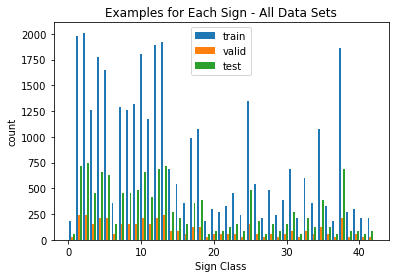

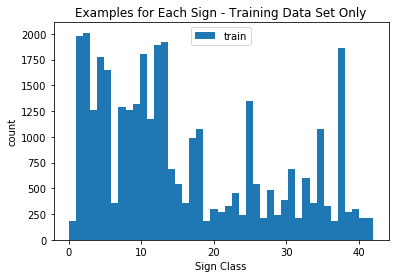

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random as rnd

# Visualizations will be shown in the notebook.
%matplotlib inline

#show all data sets
plt.hist([y_train, y_valid, y_test], n_classes, histtype='bar')
plt.legend(['train', 'valid', 'test'], loc='upper center')
plt.xlabel('Sign Class')
plt.ylabel('count')
plt.title('Examples for Each Sign - All Data Sets')
plt.show()

#just the training set 
plt.figure()
plt.hist([y_train], n_classes, histtype='bar', align='mid')
plt.legend(['train'], loc='upper center')
plt.xlabel('Sign Class')
plt.ylabel('count')
plt.title('Examples for Each Sign - Training Data Set Only')
plt.show()



### Methods for showing sample images

### Show some random images before we manipulate them

In [4]:
import matplotlib.gridspec as gridspec

#lets tak a peek at some actual images

# we're going to need this again
# accept images, labels and number of images as x,y,z
# and the number to display as num_signs
def show_random_images(x, y, z, num_signs):
    for i in range (0, num_signs):
        sign_num = rnd.randint(0, z) 
        sign_label = y[sign_num]
        plt.figure()
        plt.title(sign_names.get_value(sign_label,"SignName"))
        plt.imshow(x[sign_num])

def show_image(x, y, z, sign_num):
    sign_label = y[sign_num]
    print ("Sign label = ", sign_label)
    plt.figure()
    plt.title(sign_names.get_value(sign_label,"SignName"))
    plt.imshow(x[sign_num])
    plt.show()

def show_image_grid(x, y, z, sign_count):
    n_row = 5
    n_col = 5
    
    plt.figure(figsize = (12,12))
    gs1 = gridspec.GridSpec(n_row,n_col)
    gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes.

    for i in range(sign_count):
        ind_plot = i
        ax1 = plt.subplot(gs1[i])
        plt.axis('on')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')        
        
        plt.imshow(x[ind_plot])
        
        plt.text(2,4,str(y[ind_plot]),
             color='k',backgroundcolor='c')
        
        plt.axis('off')
    plt.show()    
    
# stole this method from elsewhere
def show_random_grid(x, y, z):
    n_row = 5
    n_col = 5
    
    plt.figure(figsize = (12,12))
    gs1 = gridspec.GridSpec(n_row,n_col)
    gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes.

    for i in range(n_row*n_col):
        ind_plot = np.random.randint(1,len(y))
        ax1 = plt.subplot(gs1[i])
        plt.axis('on')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')        
        
        plt.imshow(x[ind_plot])
        
        plt.text(2,4,str(y[ind_plot]),
             color='k',backgroundcolor='c')
        
        plt.axis('off')
    plt.show()

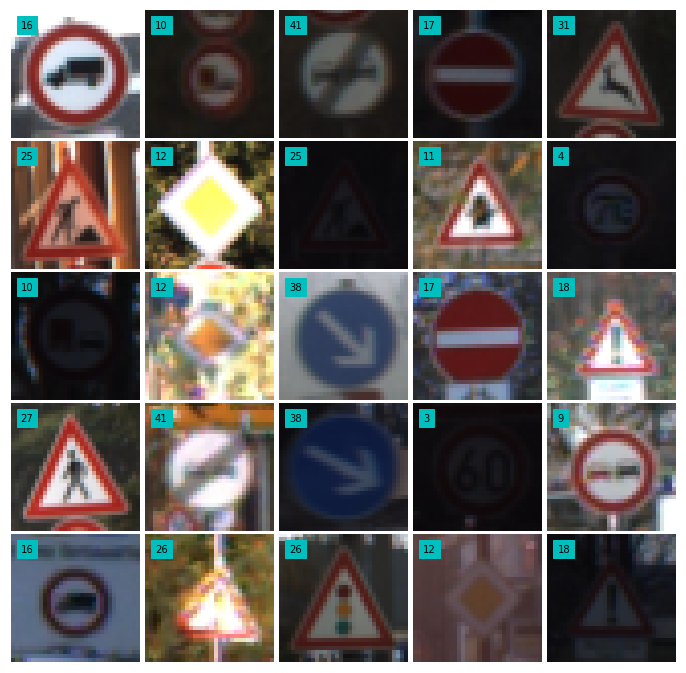

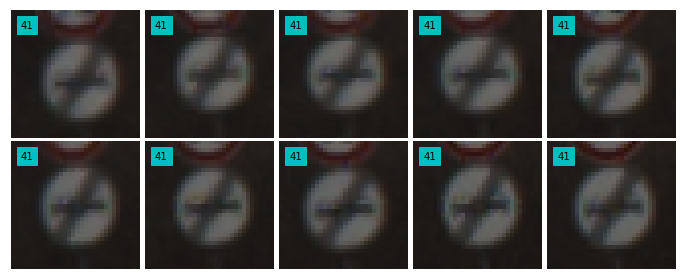

In [5]:
show_random_grid(X_train, y_train, n_train)
show_image_grid(X_train, y_train, n_train, 10)

### Pre-process the Data Set (normalization, grayscale, etc.)

### Transform Images
Rotate, Translate, and Shear

Per advice of my advisor I tried some other enhancements that didnt seem to help in my case. I left the code here so I can come back later and play with it and try and figure out why it didn't help my models.

In [6]:
# too bad this didn't work, it was nice and simple and fast but resulted in frustrating datatype mis-matches
# and poor images for training

# note to self, might have actually worked ... datatype mismatches were elsewhere so save this for reference

# import scipy.misc as scms
# from skimage import transform as sktf
# from skimage import img_as_ubyte
# from skimage import img_as_uint
# import cv2

# def transform_image(image, rotation_angle, shear_angle, translate):

#     # randomize the parameters because hey, cars dont go in straight lines
#     rotation_angle = np.random.uniform(rotation_angle, -rotation_angle)
#     shear_angle = np.random.uniform(shear_angle, -shear_angle)
#     translate = np.random.uniform(translate, -translate)
    
#     # rotate first
#     # the scikit Affine transform should do this but doesn't work as expected
#     # ir would be more efficient if I could figure it out but for now 2 steps
#     image = sktf.rotate(image, rotation_angle, center=None)
    
#     # Create Afine transform
#     # class skimage.transform.AffineTransform(matrix=None, scale=None, rotation=None, shear=None, translation=None)    
#     afine_tf = sktf.AffineTransform(shear=shear_angle,translation=translate)

#     # Apply transform to image data
#     image = sktf.warp(image, inverse_map=afine_tf)
    

# # so this didn't work as expected - maybe try again later
# #     # let fix brightness
# #     # per Vivek Yadak via my mentor
# #     image = image.astype(np.uint8)
# #     image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
# #     random_bright = .25+np.random.uniform()
# #     image[:,:,2] = image[:,:,2]*random_bright
# #     image = cv2.cvtColor(image,cv2.COLOR_HSV2RGB)
    
#     #image = img_as_ubyte(image)
#     return image 

In [7]:
# per my advisor I looked at this discussion and this previous students techniques
# I learned a lot by putting his techniques in scikit but the datatype issues made my 
# head hurt so I ended up going back and using the techniques he showed with cv2
# https://discussions.udacity.com/t/augmenting-data/245744/34
# https://docs.opencv.org/master/da/d6e/tutorial_py_geometric_transformations.html

import cv2
import numpy as np

def transform_image(image, rotation_angle, shear_angle, translate):
    
    # get shape, we need this a couple of times
    rows,cols,ch = image.shape
    
    # randomize the parameters because hey, cars dont go in straight lines
    
    # rotate     
    rotation_angle = np.random.uniform(rotation_angle)-rotation_angle/2
    Rotation_M = cv2.getRotationMatrix2D((cols/2,rows/2),rotation_angle,1)
    image = cv2.warpAffine(image,Rotation_M,(cols,rows))
    
    # translate
    translateX = np.random.uniform(translate)-translate/2
    translateY = np.random.uniform(translate)-translate/2
    Translation_M = np.float32([[1,0,translateX],[0,1,translateY]])
    image = cv2.warpAffine(image,Translation_M,(cols,rows))
    
    # Affine Transform (Shear) 
    pts1 = np.float32([[5,5],[20,5],[5,20]])    
    pt1 = 5+shear_angle*np.random.uniform()-shear_angle/2
    pt2 = 20+shear_angle*np.random.uniform()-shear_angle/2    
    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])    
    Shear_M = cv2.getAffineTransform(pts1,pts2)
    image = cv2.warpAffine(image,Shear_M,(cols,rows))

# so this didn't work as expected - maybe try again later
#     # let fix brightness
#     # per Vivek Yadak via my mentor
#     image = image.astype(np.uint8)
#     image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
#     random_bright = .25+np.random.uniform()
#     image[:,:,2] = image[:,:,2]*random_bright
#     image = cv2.cvtColor(image,cv2.COLOR_HSV2RGB)

#     image = image[:,:,0]
#     image[:,:,0] = cv2.equalizeHist(image[:,:,0])
#     image[:,:,1] = cv2.equalizeHist(image[:,:,1])
#     image[:,:,2] = cv2.equalizeHist(image[:,:,2])
#     image = image/255.-.5

    #image = img_as_ubyte(image)
    return image


### Image manipulation/augmentation
Here we actually run the images through and augment the number of images in the training data set just to increase the size of the available training data to choose from.


number of y_train_tr =  173995


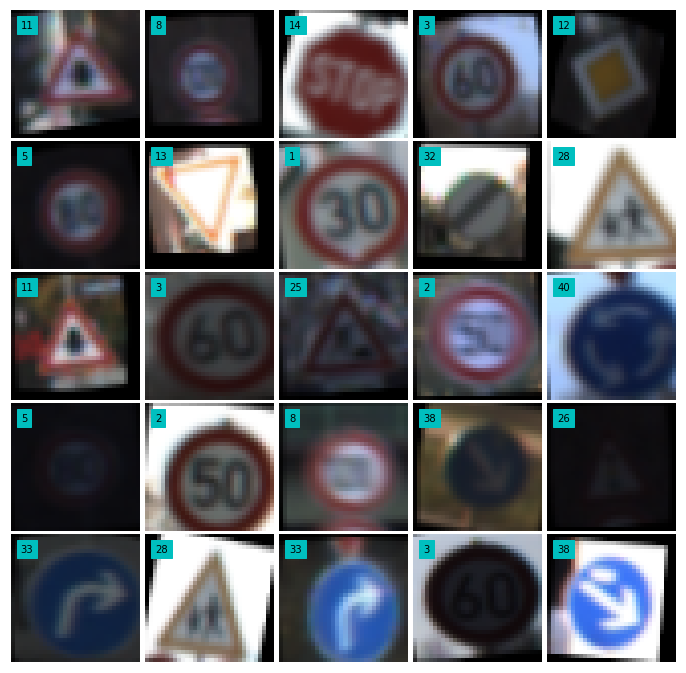

In [8]:
# image manipulation parameters
rotation_angle = 30
shear_angle = 5
translate = 3
newsets = 5

# rotation_angle = 40
# shear_angle = 10
# translate = 5
# newsets = 5


X_train_tr = []
y_train_tr = []

for set in range (newsets):
    for i in range (len(X_train)):
        image_tr = transform_image(X_train[i], rotation_angle, shear_angle, translate)
        X_train_tr.append(image_tr)
        y_train_tr.append(y_train[i])

n_train_tr = len(y_train_tr)
print ("number of y_train_tr = ", n_train_tr)

show_random_grid(X_train_tr, y_train_tr, n_train_tr)


### Normalization methods

We're going to normailze the brightness/histogram across all the images. We need to do this to the validation and test sets as well. 

Some of these were tried and discarded but I left them here for personal reference to remember or in case I come back to them later

In [9]:
# simple numerical normalization method as suggested
# although quite simple this works remarkably well 

# def normalize_data(image):
#    return (image.astype(np.float32) - 128.0) / 128.0

In [10]:
# import numpy as np
# import cv2

# this didnt work ... seems like it should have from
# the cv2 example documentation I found
# perhaps I can come back once the model is working and try and tune this 
# played with this several ways and it doesn't seem to enhance our process
# I think our images are just too small for CLAHE to be effective
# again saved as reference

# #CLAHE histogram normalization
# def normalize_data(image):
    
#     #clahe = cv2.createCLAHE()
#     clahe = cv2.createCLAHE(tileGridSize=(2,2))
    
# #     image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
# #     image = clahe.apply(image)
#     image[:,:,0] = clahe.apply(image[:,:,0])
#     image[:,:,1] = clahe.apply(image[:,:,1])
#     image[:,:,2] = clahe.apply(image[:,:,2])
#     #image = image/255.-.5
#     return image


In [11]:
import cv2
# found at Viveks example - does not initially work better than the simple version
# basic histogram equalization using cv2

def normalize_data(image):

    image[:,:,0] = cv2.equalizeHist(image[:,:,0])
    image[:,:,1] = cv2.equalizeHist(image[:,:,1])
    image[:,:,2] = cv2.equalizeHist(image[:,:,2])
        
    return image


In [12]:
# normalize images 
import numpy as np

X_train_n = np.array([normalize_data(X_train[i]) for i in range(len(X_train))])
y_train_n = y_train

X_train_tr_n = np.array([normalize_data(X_train_tr[i]) for i in range(len(X_train_tr))])
y_train_tr_n = y_train_tr

X_valid_n = np.array([normalize_data(X_valid[i]) for i in range(len(X_valid))])

X_test_n = np.array([normalize_data(X_test[i]) for i in range(len(X_test))])

# mix in the original un-transformed images with the transformed ones
# seems to make sense to put the un-transformed images into the training set
X_train_tr_n = np.concatenate((X_train_tr_n,X_train_n))
y_train_tr_n = np.concatenate((y_train_tr_n,y_train_n))
n_train_tr_n = len(y_train_tr_n)

print("X_train_tr_n length = ", len(X_train_tr_n))

X_train_tr_n length =  208794


### Show some example normalized images

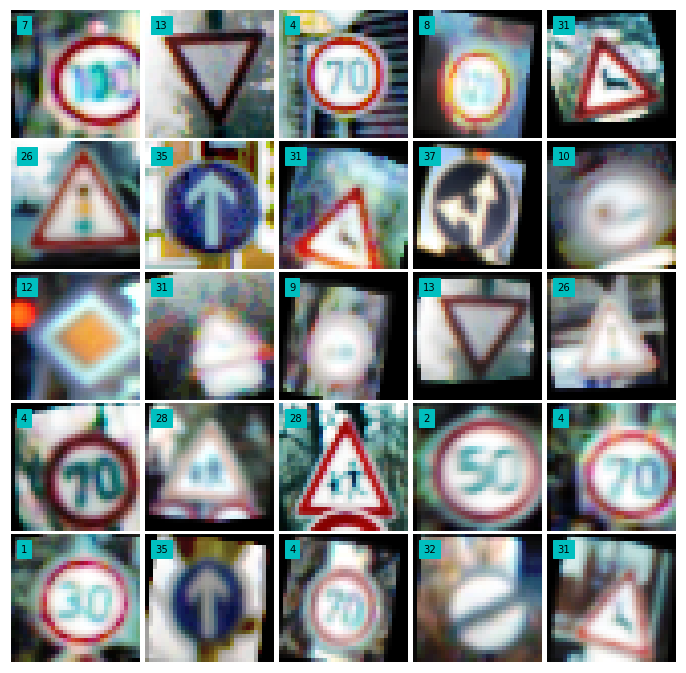

In [13]:
show_random_grid(X_train_tr_n, y_train_tr_n, len(X_train_tr_n))

### Model Architecture

In [14]:
# This is the tensorflow model
# Based largely off of LeNet
# I fiddled with dropouts in various places and als tweaked the filter sizes a little

import tensorflow as tf
from sklearn.utils import shuffle
from tensorflow.contrib.layers import flatten

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32) 

# Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
mu = 0
sigma = 0.1


### Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6
conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 12), mean = mu, stddev = sigma))
conv1_b = tf.Variable(tf.zeros(12))
conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
# Activation
conv1 = tf.nn.relu(conv1)
# Pooling. Input = 28x28x6. Output = 14x14x6.
conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')


### Layer 2: Convolutional. Output = 10x10x16
conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 12, 16), mean = mu, stddev = sigma))
conv2_b = tf.Variable(tf.zeros(16))
conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
# Activation
conv2 = tf.nn.relu(conv2)
# Dropout.
#conv2 = tf.nn.dropout(conv2, keep_prob)
# Pooling. Input = 10x10x16. Output = 5x5x16.
conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
# Flatten. Input = 5x5x16. Output = 400.
fc0   = flatten(conv2)


### Layer 3: Fully Connected. Input = 400. Output = 120.
fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
fc1_b = tf.Variable(tf.zeros(120))
fc1   = tf.matmul(fc0, fc1_W) + fc1_b
# Activation.
fc1    = tf.nn.relu(fc1)
# Dropout
#fc1 = tf.nn.dropout(fc1, keep_prob)


### Layer 4: Fully Connected. Input = 120. Output = 84.
fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
fc2_b  = tf.Variable(tf.zeros(84))
fc2    = tf.matmul(fc1, fc2_W) + fc2_b
# Activation.
fc2    = tf.nn.relu(fc2)
# Dropout.
fc2 = tf.nn.dropout(fc2, keep_prob)


### Layer 5: Fully Connected. Input = 84. Output = 43
fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
fc3_b  = tf.Variable(tf.zeros(43))
logits = tf.matmul(fc2, fc3_W) + fc3_b



### Train, Validate and Test the Model

Here is where the action really happens. We train and validate the model, print results as we go along, and graph it because a picture is sometimes worth a thousand words.


Training...
EPOCH | Training Accuracy | Validation Accuracy | Training Loss | Validation Loss

1           0.2872               0.2773               2.5572         2.5589
2           0.4021               0.4181               2.0123         1.9555
3           0.4759               0.4630               1.5437         1.4987
4           0.5546               0.5658               1.3278         1.3034
5           0.6399               0.6556               1.0979         1.0945
6           0.7230               0.7401               0.8356         0.7885
7           0.7905               0.8039               0.6345         0.5984
8           0.8497               0.8528               0.4724         0.4821
9           0.8828               0.8932               0.3632         0.3454
10          0.8998               0.9093               0.3065         0.2771
11          0.9236               0.9186               0.2312         0.2598
12          0.9261               0.9329               0.2252         

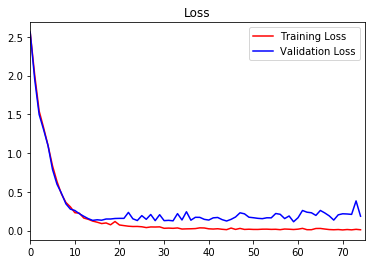

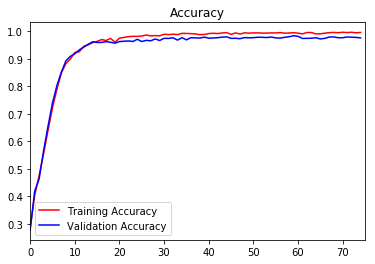

Model saved


In [15]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
import time
from datetime import timedelta

EPOCHS = 75
BATCH_SIZE = 256
learn_rate = 0.0005

train_loss_history = []
train_accuracy_history = []
valid_loss_history = []
valid_accuracy_histroy = []
max_accuracy = 0.0

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learn_rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]        
        loss, accuracy = sess.run([loss_operation, accuracy_operation], feed_dict={
            x: batch_x, 
            y: batch_y, 
            keep_prob: 1})                
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
    
    return total_loss/num_examples, total_accuracy/num_examples

# and finally we actually train the model
with tf.Session() as sess:
    start_time = time.time()
    
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_tr_n)

    print("Training...")
    print("EPOCH | Training Accuracy | Validation Accuracy | Training Loss | Validation Loss")    
    print()

    
    for i in range(EPOCHS):
        # always shuffle the images around so we get random ones 
        X_train_tr_n, y_train_tr_n = shuffle(X_train_tr_n, y_train_tr_n)
        X_valid_n, y_valid = shuffle(X_valid_n, y_valid)
        
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_tr_n[offset:end], y_train_tr_n[offset:end]
            sess.run(training_operation, feed_dict={
                x: batch_x, 
                y: batch_y, 
                keep_prob: 0.5})

        training_loss, training_accuracy = evaluate(X_train_tr_n, y_train_tr_n)
        train_loss_history.append(training_loss)
        train_accuracy_history.append(training_accuracy)
        
        validation_loss, validation_accuracy = evaluate(X_valid_n, y_valid)
        valid_loss_history.append(validation_loss)
        valid_accuracy_histroy.append(validation_accuracy)

        if (validation_accuracy > max_accuracy): 
            saver.save(sess, './lenetMax')
            max_accuracy = validation_accuracy
                
        print("{:<4d}        {:^.4f}               {:^.4f}               {:^.4f}         {:^.4f}".format(i+1, \
            training_accuracy, validation_accuracy, training_loss, validation_loss))
   
    end_time = time.time()
    time_diff = end_time-start_time
    print("elapsed time: {:^.2f}".format(time_diff))

    loss_plot = plt.subplot()
    loss_plot.set_title('Loss')
    loss_plot.plot(train_loss_history, 'r', label='Training Loss')
    loss_plot.plot(valid_loss_history, 'b', label='Validation Loss')
    loss_plot.set_xlim([0, EPOCHS])
    loss_plot.legend(loc=0)
    plt.show()

    accuracy_plot = plt.subplot()
    accuracy_plot.set_title('Accuracy')
    accuracy_plot.plot(train_accuracy_history, 'r', label='Training Accuracy')
    accuracy_plot.plot(valid_accuracy_histroy, 'b', label='Validation Accuracy')
    accuracy_plot.set_xlim([0, EPOCHS])
    accuracy_plot.legend(loc=0)
    plt.show()

    
    saver.save(sess, './lenet')
    print("Model saved")
    

### Make sure we can reload the saved model

In [21]:
# reverify training accuracy
# remember we saved both the session at the end and the best model we ever saw - use the best
with tf.Session() as sess:
    saver.restore(sess, './lenetMax')
    training_loss, training_accuracy = evaluate(X_train_tr_n, y_train_tr_n)
    print("Training Accuracy = {:.4f}".format(training_accuracy))
    validation_loss, validation_accuracy = evaluate(X_valid_n, y_valid)
    print("Validation Accuracy = {:.4f}".format(validation_accuracy))

Training Accuracy = 0.9954
Validation Accuracy = 0.9844


### Run the model against the test set

In [22]:
# test set accuracy 
with tf.Session() as sess:
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, './lenetMax')
    test_loss, test_accuracy = evaluate(X_test_n, y_test)
    print("Test Accuracy = {:.4f}".format(test_accuracy))

Test Accuracy = 0.9466


---

## Step 3: Test a Model on New Images

I grabbed some images from various places that Google images led me too. Most were actually from other students.

To save the aggravation of extra code here I just resized them on my computer before adding them to the project.


### Load and Output the Images

In [23]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import scipy.ndimage as ndi

my_images = []
my_labels = []

my_images.append(ndi.imread('./examples/7-100km.jpg'))
my_labels.append(7)
my_images.append(ndi.imread('./examples/11-row-next.jpg'))
my_labels.append(11)
my_images.append(ndi.imread('./examples/13-yield.jpg'))
my_labels.append(13)
my_images.append(ndi.imread('./examples/17-no-entry.jpg'))
my_labels.append(17)
my_images.append(ndi.imread('./examples/25-road-work.jpg'))
my_labels.append(25)

n_my_images = len(my_images)
print ("Number of new images loaded = ", n_my_images)



Number of new images loaded =  5


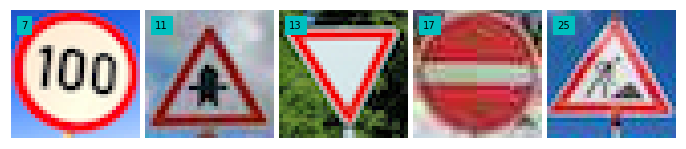

My images after normalization


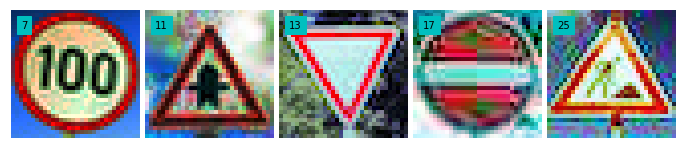

In [24]:
# show them before normalization
# for i in range(n_my_images):
#     show_image(my_images, my_labels, n_my_images, i)
show_image_grid(my_images, my_labels, n_my_images, 5)

# normalize my images
my_images_n = np.array([normalize_data(my_images[i]) for i in range(n_my_images)])

print ("My images after normalization")
# for i in range(n_my_images):
#     show_image(my_images_n, my_labels, n_my_images, i)
show_image_grid(my_images_n, my_labels, n_my_images, 5)
    

### Predict the Sign Type for Each Image and Analyze Performance

In [27]:
# test my downloaded images

softmax = tf.nn.softmax(logits)
labels = tf.argmax(softmax, axis=1)

with tf.Session() as sess:
    saver.restore(sess, './lenetMax')
    predicted_labels = sess.run(labels, feed_dict={x: my_images_n, y: my_labels, keep_prob: 1})
    my_loss, my_accuracy = evaluate(my_images_n, my_labels)

for i in range(n_my_images):
    print("Image ", i+1, "predicted:", predicted_labels[i], "actual:", my_labels[i], \
          "Correct prediction:", predicted_labels[i]==my_labels[i])

print("\nAccuracy on my signs = {:.4f}".format(my_accuracy))

Image  1 predicted: 11 actual: 7 Correct prediction: False
Image  2 predicted: 11 actual: 11 Correct prediction: True
Image  3 predicted: 13 actual: 13 Correct prediction: True
Image  4 predicted: 17 actual: 17 Correct prediction: True
Image  5 predicted: 28 actual: 25 Correct prediction: False

Accuracy on my signs = 0.6000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [32]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, './lenetMax')
    my_softmaxes = sess.run(softmax, feed_dict={x: my_images_n, y: my_labels, keep_prob: 1})
    top_5 = sess.run(tf.nn.top_k(my_softmaxes, 5))
    print(top_5)
    
    

TopKV2(values=array([[  9.99935627e-01,   6.43333478e-05,   5.64296804e-11,
          4.41504811e-14,   2.86955891e-14],
       [  1.00000000e+00,   1.33470480e-14,   6.83242527e-24,
          2.12374799e-28,   3.55552431e-35],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   2.03085866e-21,   7.91097671e-25,
          9.11259898e-33,   9.82023134e-34],
       [  5.37557721e-01,   4.62441295e-01,   8.32136209e-07,
          1.42813448e-07,   1.25235128e-10]], dtype=float32), indices=array([[11, 27, 20, 30, 19],
       [11, 30, 20, 27, 25],
       [13,  0,  1,  2,  3],
       [17, 18, 14,  9, 26],
       [28, 25, 20, 24, 29]], dtype=int32))


---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [33]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
            

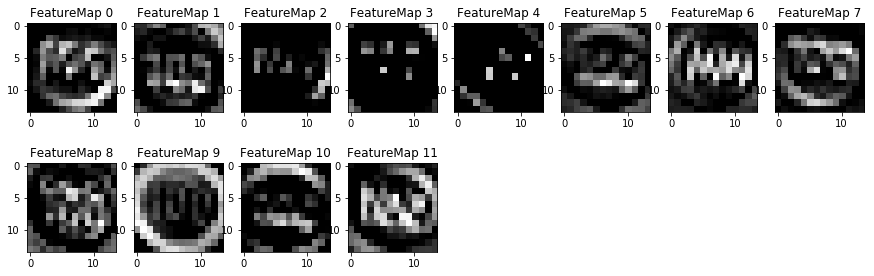

In [34]:
with tf.Session() as sess:
    saver.restore(sess, './lenetMax')
    outputFeatureMap([my_images_n[0]], conv1)